<a href="https://colab.research.google.com/github/pntnone/Deep-Learning/blob/main/Seam_Scarving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from io import BytesIO
import requests
from PIL import Image

In [ ]:
def download_image(url, file_name):
  r = requests.get(url)
  im = Image.open(BytesIO(r.content))
  im.save(file_name)

In [ ]:
  url = "https://ichef.bbci.co.uk/news/976/cpsprodpb/2132/production/_123589480_aryaz.jpg"
  download_image(url, "human_and_dog.jpg")

In [ ]:
      im = cv2.imread("human_and_dog.jpg")

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def rescaleImg(img, scale=0.5):
  width, height = int(img.shape[1]*scale), int(img.shape[0]*scale)
  return cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

In [ ]:
img_resize = rescaleImg(im)

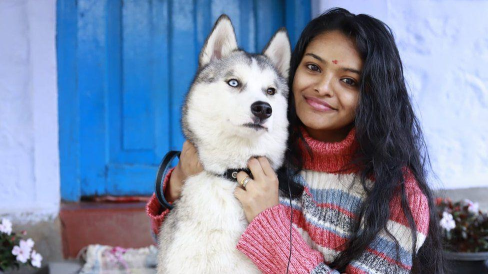

In [ ]:
cv2_imshow(img_resize)

In [ ]:
img_resize.shape

(274, 488, 3)

In [ ]:
img_brightness = np.mean(img_resize, axis=-1)

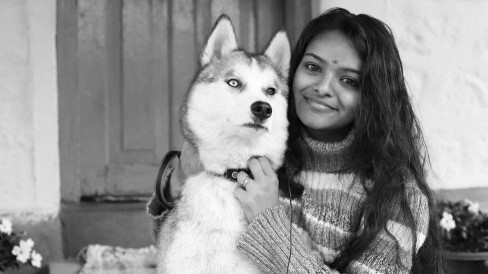

In [ ]:
cv2_imshow(img_brightness)

In [ ]:
img_brightness_fl = img_brightness/255

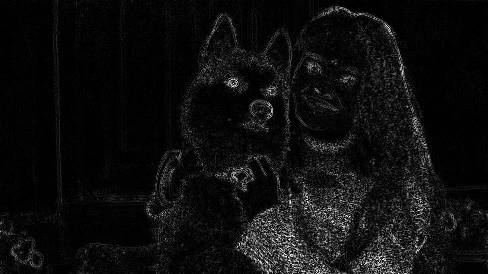

In [ ]:
#Laplacian
lap_img = cv2.Laplacian(img_brightness, cv2.CV_64F)
lap_img = np.uint8(np.absolute(lap_img))
cv2_imshow(lap_img)

In [ ]:
#Sobel
sobelx = cv2.Sobel(img_brightness_fl, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img_brightness_fl, cv2.CV_64F, 0, 1)

In [ ]:
sobel_img = np.sqrt(sobelx**2, sobely**2)

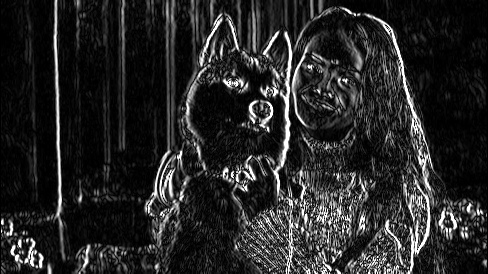

In [ ]:
cv2_imshow(sobel_img*255)

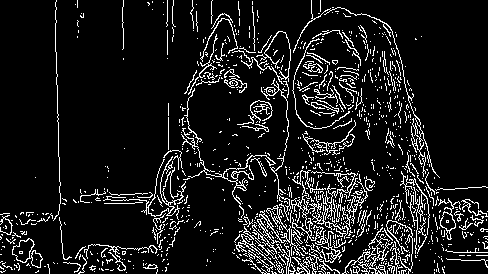

In [ ]:
#Canny
img_canny = cv2.Canny(np.uint8(img_brightness), 100, 100)
cv2_imshow(img_canny)

In [ ]:
img_brightness

array([[180.33333333, 181.33333333, 181.33333333, ..., 223.66666667,
        222.        , 222.        ],
       [181.        , 182.        , 183.        , ..., 226.33333333,
        227.66666667, 228.        ],
       [182.        , 184.        , 186.33333333, ..., 227.33333333,
        229.        , 230.        ],
       ...,
       [ 80.33333333,  65.33333333,  53.        , ...,  27.        ,
         28.        ,  25.66666667],
       [101.        ,  91.33333333,  81.66666667, ...,  27.        ,
         28.        ,  28.        ],
       [107.        , 104.33333333,  97.66666667, ...,  30.        ,
         31.        ,  30.        ]])

In [ ]:
  def energy_image(img):
    img_brightness = np.mean(img_resize, axis=-1)
    img_brightness_fl = img_brightness/255
    sobelx = cv2.Sobel(img_brightness_fl, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(img_brightness_fl, cv2.CV_64F, 0, 1)
    return np.sqrt(sobelx**2, sobely**2)

In [ ]:
def energy_map_func(energy):
  energy_map = np.zeros(energy.shape)
  energy_map[-1, :] = energy[-1, :]

  directions = np.zeros(energy.shape, dtype='int8')

  for i in range(energy.shape[0]-2, -1, -1):
    for j in range(0, energy.shape[1]):
      left = max(0, j-1)
      right = min(j+1, energy.shape[1]-1)

      directions[i,j] = np.argmax(energy[i+1, left:right+1])
      energy_map[i,j] = energy[i,j] + energy[i+1, left:right+1][directions[i,j]]

      if j!=0: directions[i,j]-=1

  return energy_map, directions

In [ ]:
energy_map_img, directions_img = energy_map_func(sobel_img)

In [ ]:
sobel_img = energy_image(img_resize)

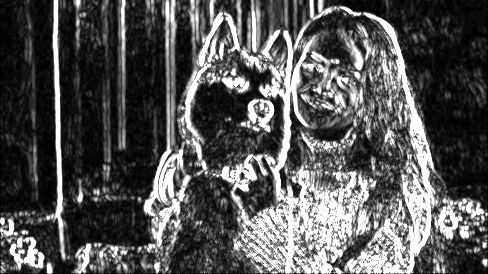

In [ ]:
cv2_imshow(energy_map_img*255)

In [ ]:
def find_seam(directions, col):
  seam = np.zeros((directions.shape[0]), dtype="uint32")
  seam[0] = col
  for i in range(1, directions.shape[0]):
    seam[i] = seam[i-1] + directions[i-1, seam[i-1]]
  
  return seam

def draw_seam(img, seam):
  seam_img = np.copy(img)
  for i in range(0, img.shape[0]-1):
    seam_img[i, seam[i]] = [255, 0, 0]
  return seam_img

In [ ]:
seam = find_seam(directions_img, 100)
seam_img = draw_seam(img_resize, seam)

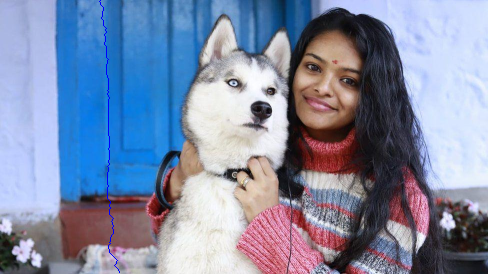

In [ ]:
cv2_imshow(seam_img)

In [ ]:
def remove_seam(img, seam):
  new_img = np.zeros((img.shape[0], img.shape[1]-1, 3), dtype=np.uint8)
  for i in range(img.shape[0]):
    if seam[i]>0 and seam[i]<img.shape[1]-1:
      new_img[i, :] = np.concatenate((img[i, 0:seam[i]], img[i, seam[i]+1:img.shape[1]]), axis=0)
    elif seam[i] == 0:
      new_img[i, :] = img[i, 1:]
    elif seam[i] == img.shape[1]-1:
      new_img[i, :] = img[i, :-1]
  
  return new_img

In [ ]:
remove_1seam_image = remove_seam(seam_img, seam)

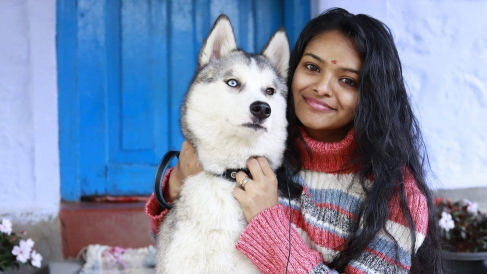

In [ ]:
cv2_imshow(remove_1seam_image)

In [ ]:
def seam_carving(img, rewidth):
  new_img = np.copy(img)
  for _ in range(img.shape[1]-rewidth):
    energy = energy_image(new_img)
    energy_map, directions = energy_map_func(energy)
    col = np.argmax(energy_map[0])
    seam = find_seam(directions, col)
    new_img = remove_seam(new_img, seam)
  
  return new_img

In [ ]:
new_img = seam_carving(img_resize, img_resize.shape[1]-50)

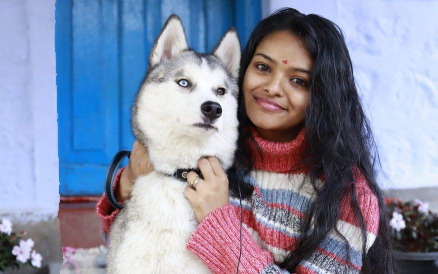

In [ ]:
cv2_imshow(new_img)

In [ ]:
a = [1, 2, 3]

In [ ]:
del a[0]

In [ ]:
a

[2, 3]

In [ ]:
del a[-1]

In [ ]:
a = list(range(20))

In [ ]:
del a[0]

In [ ]:
del a[-1]